In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [19]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
single_image=x_train[0]

In [22]:
single_image.shape

(28, 28)

In [23]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
single_image.max()


255

In [25]:
single_image.min()

0

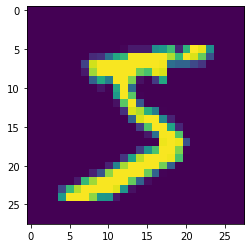

In [26]:
plt.imshow(single_image)

In [27]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
y_train.shape

(60000,)

In [30]:
y_example=to_categorical(y_train,num_classes=10)

In [31]:
y_example.shape

(60000, 10)

In [32]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [33]:
y_cat_train=to_categorical(y_train,num_classes=10)

In [34]:
# normalisation

x_train=x_train/255
x_test=x_test/255

In [35]:
scaled_image=x_train[0]

In [37]:
scaled_image.max()

1.0

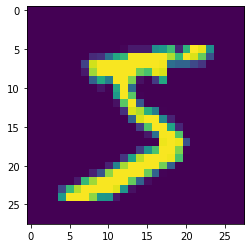

In [38]:
plt.imshow(scaled_image)

In [41]:
# batch_size,height,width,color_channel
x_train=x_train.reshape(60000,28,28,1)

In [42]:
x_test=x_test.reshape(10000,28,28,1)

In [43]:
from tensorflow.keras.models import Sequential

In [44]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [45]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),padding='valid',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # 28*28
model.add(Dense(128,activation='relu'))


#OUTPUT LAYER-MULTI ClASS hence Output suhould be 'Softmax'
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [48]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1445 - accuracy: 0.9566 - val_loss: 0.0541 - val_accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.0407 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0375 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0334 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0149 - accuracy: 0.9953 - val_loss: 0.0410 - val_accuracy: 0.9872


In [51]:
metrics=pd.DataFrame(model.history.history)

In [52]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.144457,0.956633,0.054052,0.9828
1,0.046199,0.985850,0.040701,0.9868
2,0.030659,0.990250,0.037478,0.9883
3,0.019403,0.993717,0.033382,0.9889
4,0.014949,0.995283,0.041033,0.9872


<AxesSubplot:>

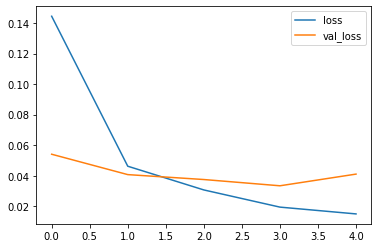

In [53]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

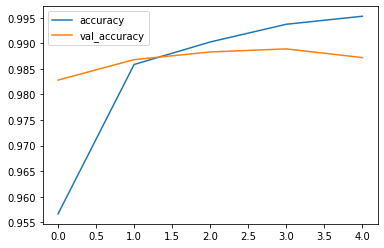

In [55]:
metrics[['accuracy','val_accuracy']].plot()

In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.0410330630838871, 0.9872000217437744]

In [80]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 5ms/step


In [83]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [84]:
y_cat_test.shape

(10000, 10)

In [85]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [86]:
print(classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [87]:
confusion_matrix(y_test,predictions)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1132,    1,    1,    0,    0,    0,    0,    1,    0],
       [   2,    1, 1012,    1,    2,    0,    1,   12,    1,    0],
       [   0,    0,    0,  999,    0,    5,    0,    3,    3,    0],
       [   0,    0,    0,    0,  974,    0,    1,    0,    0,    7],
       [   1,    0,    1,    3,    0,  885,    2,    0,    0,    0],
       [   7,    2,    0,    0,    3,    4,  940,    0,    2,    0],
       [   0,    0,    5,    0,    0,    0,    0, 1016,    1,    6],
       [   9,    1,    1,    0,    0,    1,    1,    3,  955,    3],
       [   1,    1,    0,    0,    6,    8,    0,   10,    3,  980]],
      dtype=int64)

In [89]:
import seaborn as sns

<AxesSubplot:>

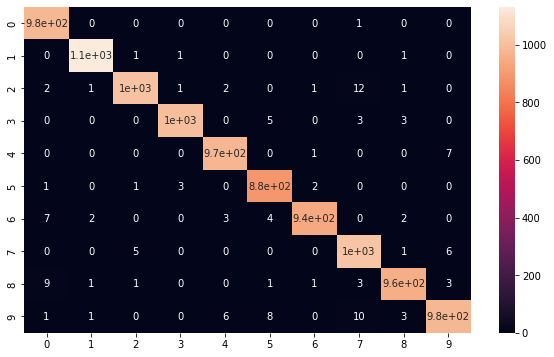

In [90]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

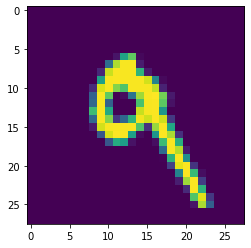

In [91]:
# How to add new image and check it (example)
my_num=x_test[7]
plt.imshow(my_num)

In [92]:
#num_image,width,height,color_channel

np.argmax(model.predict(my_num.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 22ms/step


array([9], dtype=int64)